In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy.cluster.vq import kmeans
from scipy.cluster.vq import vq


import plotly.express as px

from sklearn.ensemble import IsolationForest


In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
709,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
710,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
711,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
712,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:>

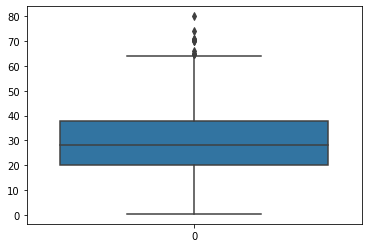

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df['Age'])



In [5]:
df1=df[['Age','Fare']]

In [6]:
df1

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
709,39.0,29.1250
710,27.0,13.0000
711,19.0,30.0000
712,26.0,30.0000


In [7]:

#Db Scan This is the total number of noisy points. SKLearn labels the noisy points as (-1).
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_detection.fit_predict(df1)
list(clusters).count(-1)

70

In [10]:
#Isolation Forest-If the result is -1, it means that this specific data point is an outlier
from sklearn.ensemble import IsolationForest
import numpy as np

clf = IsolationForest( behaviour = 'new', max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(df1)
preds
list(preds).count(-1)

C:\Users\M Venu Gopala Rao\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:252: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  warn(


224

In [14]:
#Local Outlier Factor

from sklearn.neighbors import LocalOutlierFactor

#initialise the algorithm
lof = LocalOutlierFactor(n_neighbors = 20)
#fit it to the training data, since we don't use it for novelty than this is fine
y_pred = lof.fit_predict(df1)

#extract the predictions as strings
df1["lof_outliers"] = y_pred.astype(str)
#print the number of outliers relative to non-outliers
print(df1["lof_outliers"].value_counts())
#extract the outlier scores
df1["lof_scores"] = lof.negative_outlier_factor_

1     686
-1     28
Name: lof_outliers, dtype: int64


<ipython-input-14-4cfa087abd5b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["lof_outliers"] = y_pred.astype(str)
<ipython-input-14-4cfa087abd5b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["lof_scores"] = lof.negative_outlier_factor_
